In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from scipy.stats import pointbiserialr, spearmanr

In [2]:

header_list = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 'sex',
               'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

data = pd.read_csv("census.data", names=header_list)

## Data pre-processing

In [3]:
# remove missing values
data = data[data["workclass"] != " ?"]
data = data[data["occupation"] != " ?"]
data = data[data["native-country"] != " ?"]

In [4]:
# change target data to int type
mapping = {' >50K': 1, ' <=50K': 0}
data.income = [mapping[item] for item in data.income]

In [5]:
# drop target class
target = data['income']
features = data.drop('income', axis='columns')

df_f = pd.DataFrame(data = features)
df_t = pd.DataFrame(data = target)

In [6]:
# split features into data types
numerical = [i for i in df_f.columns if df_f[i].dtypes != 'object']
categorical = [i for i in df_f.columns if i not in numerical]
discreet = [i for i in numerical if len(df_f[i].unique()) < 10]
continuous = [i for i in numerical if i not in discreet]

In [7]:
# Min-Max scaling
scaler = MinMaxScaler()
df_f_scaled = pd.DataFrame(data = df_f)
df_f_scaled[numerical] = scaler.fit_transform(df_f_scaled[numerical])

In [8]:
# best features according to corr-matrix
selected_features = ['marital-status', 'education-num', 'relationship', 'age', 'hours-per-week', 'capital-gain']
df_f_scaled[selected_features].head()

,marital-status,education-num,relationship,age,hours-per-week,capital-gain
0,Never-married,0.800000,Not-in-family,0.301370,0.397959,0.02174
1,Married-civ-spouse,0.800000,Husband,0.452055,0.122449,0.00000
2,Divorced,0.533333,Not-in-family,0.287671,0.397959,0.00000
3,Married-civ-spouse,0.400000,Husband,0.493151,0.397959,0.00000
4,Married-civ-spouse,0.800000,Wife,0.150685,0.397959,0.00000


In [10]:
# all features selected processed features
features_processed_raw = pd.get_dummies(df_f_scaled)
features_processed_reduced = pd.get_dummies(df_f_scaled[selected_features])
# features_processed.columns

In [11]:
features_processed_raw.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.043338,0.800000,0.02174,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.047277,0.800000,0.00000,0.0,0.122449,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.137244,0.533333,0.00000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.150212,0.400000,0.00000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.220703,0.800000,0.00000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
features_processed_reduced.head()

,education-num,age,hours-per-week,capital-gain,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0.800000,0.301370,0.397959,0.02174,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.800000,0.452055,0.122449,0.00000,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0.533333,0.287671,0.397959,0.00000,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0.400000,0.493151,0.397959,0.00000,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0.800000,0.150685,0.397959,0.00000,0,0,1,0,0,0,0,0,0,0,0,0,1


# KNN

In [75]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(features_processed_reduced, df_t, test_size=0.2)
# X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(features_processed_raw, df_t, test_size=0.2)


X_train, X_test, y_train, y_test= train_test_split(features_processed_reduced, df_t, test_size=0.2)
# X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(features_processed_raw, df_t, test_size=0.2)

def plot_roc_knn(k, X_tr, X_tst, y_tr, y_tst):

    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_tr,y_tr)

    y_scores = knn.predict_proba(X_tst)
    fpr, tpr, threshold = roc_curve(y_tst, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of kNN')
    plt.show()

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

C:\Users\majd_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of model at K=4 is 0.8155146693187469


In [78]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

C:\Users\majd_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\majd_\AppData\Local\Temp/ipykernel_22680/1727187911.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  error_rate.append(np.mean(pred_i != y_test))


ValueError: Unable to coerce to Series, length must be 1: given 6033

## reduced features

In [14]:
# plot_roc_knn(5, X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced)

In [15]:
# plot_roc_knn(10, X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced)

In [19]:
# plot_roc_knn(15, X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced)

In [17]:
# plot_roc_knn(25, X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced)

In [18]:
# plot_roc_knn(50, X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced)

## raw features

In [ ]:
# plot_roc_knn(50, X_train_raw, X_test_raw, y_train_raw, y_test_raw)

In [27]:
X = features_processed_reduced
y = df_t

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

accuracy, precision, recall = {}, {}, {}

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test,  predictions)
    auc = roc_auc_score(y_test, predictions)
    
    result_table = result_table.append({'classifiers':models[key].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

# model_names = list(models.keys())   

result_table.set_index('classifiers', inplace=True)

C:\Users\majd_\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\majd_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\majd_\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [61]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.829770,0.542744,0.708478
Support Vector Machines,0.832422,0.547382,0.715771
Decision Trees,0.814189,0.573890,0.644345
Random Forest,0.828278,0.596421,0.678222
Naive Bayes,0.713741,0.885355,0.462284
K-Nearest Neighbor,0.815349,0.576541,0.646840


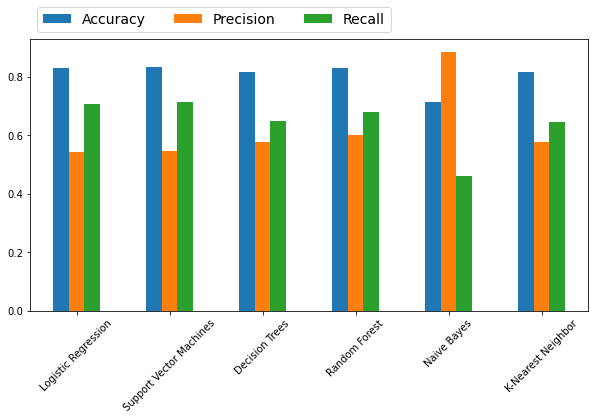

<Figure size 4320x2160 with 0 Axes>

In [47]:

ax  = df_model.plot.bar(rot=45, figsize=(10,5))
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.figure(figsize=(60,30))
plt.tight_layout()
plt.show()

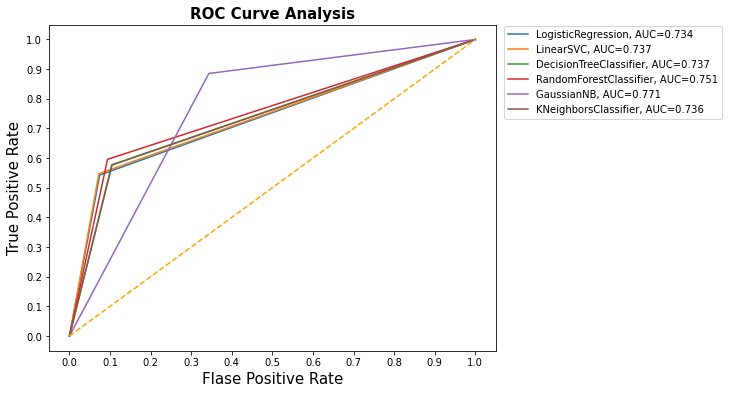

In [74]:


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(bbox_to_anchor=(1.51, 1.0), loc=1, borderaxespad=0.1)

plt.show()

In [65]:
# # Code source: Gaël Varoquaux
# #              Andreas Müller
# # Modified for documentation by Jaques Grobler
# # License: BSD 3 clause

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# h = 0.02  # step size in the mesh

# names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
# ]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
# ]

# # X, y = make_classification(
# #     n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# # )
# # rng = np.random.RandomState(2)
# # X += 2 * rng.uniform(size=X.shape)
# # linearly_separable = (X, y)

# # datasets = [
# #     make_moons(noise=0.3, random_state=0),
# #     make_circles(noise=0.2, factor=0.5, random_state=1),
# #     linearly_separable,
# # ]

# X = features_processed_reduced
# y = df_t

# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# # for ds_cnt, ds in enumerate(datasets):
# #     # preprocess dataset, split into training and test part
# #     X, y = ds
# #     X = StandardScaler().fit_transform(X)
# #     X_train, X_test, y_train, y_test = train_test_split(
# #         X, y, test_size=0.4, random_state=42
# #     )

# x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
# y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # just plot the dataset first
# cm = plt.cm.RdBu
# cm_bright = ListedColormap(["#FF0000", "#0000FF"])
# ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
# if ds_cnt == 0:
#     ax.set_title("Input data")
# # Plot the training points
# ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# # Plot the testing points
# ax.scatter(
#     X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
# )
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())
# ax.set_xticks(())
# ax.set_yticks(())
# i += 1

# # iterate over classifiers
# for name, clf in zip(names, classifiers):
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#     clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)

#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     if hasattr(clf, "decision_function"):
#         Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     else:
#         Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

#     # Plot the training points
#     ax.scatter(
#         X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
#     )
#     # Plot the testing points
#     ax.scatter(
#         X_test[:, 0],
#         X_test[:, 1],
#         c=y_test,
#         cmap=cm_bright,
#         edgecolors="k",
#         alpha=0.6,
#     )

#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     if ds_cnt == 0:
#         ax.set_title(name)
#     ax.text(
#         xx.max() - 0.3,
#         yy.min() + 0.3,
#         ("%.2f" % score).lstrip("0"),
#         size=15,
#         horizontalalignment="right",
#     )
#     i += 1

# plt.tight_layout()
# plt.show()

In [ ]:
# # remove unrelated features 

# data = data.drop("education", axis="columns")
# data = data.drop("fnlwgt", axis="columns")
# data = data.drop("sex", axis="columns")

In [ ]:
# sns.countplot(data['income'], palette='coolwarm', hue='sex', data=data);

In [ ]:
# sns.countplot(data['income'], palette='coolwarm', hue='education', data=data)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [ ]:
# sns.countplot(data['income'], palette='coolwarm', hue='race', data=data);

In [ ]:
# correlation_mat = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1) # data.corr # for numerical only 

# sns.heatmap(correlation_mat, annot = True, linewidths= 0.5)


# plt.title("Correlation matrix of income data")


# plt.show()

In [ ]:
# correlation_mat

## Standardization

In [ ]:
# sk = ["capital-gain", "capital-loss"]
# df_f_log = pd.DataFrame(data=df_f)
# df_f_log[sk] = df_f[sk].apply(lambda x: np.log(x + 1))

In [ ]:
# df_f_log["capital-gain"].values

In [ ]:
# sns.displot(df_f_log, x="capital-gain")


# plt.ylim([0, 30000])
# plt.show()

In [ ]:
# sns.displot(df_f, x="capital-gain")


# plt.ylim([0, 30000])
# plt.show()

In [ ]:

# # sk - ['g', 'l']
# # features_log_transformed - pd.DataFrame(data features_raw)
# # features_log_transformed[sk] - features_raw[sk]. apply(lambda x: np.log(x + 1))
          
          
# from sklearn.preprocessing import MinlaxScaler
# scaler - MinlaxScaler()
# numerical - ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# features log_minmax_transform pd.DataFrame(data features_log_transformed)
# features_log_minmax_transform[numerical] - scaler.fit_transform(features_log_transformed[numerical])
# display(features log_minmax_transform.head(n 5))

In [ ]:
# change workclass to numerical values

# mapping = {' Private': 1, ' Self-emp-not-inc': 2, ' Local-gov': 3,
#            ' State-gov': 4, ' Self-emp-inc': 5,
#            ' Federal-gov': 6, ' Without-pay': 7}
# data.workclass = [mapping[item] for item in data.workclass]

# # change marital-status to numerical values

# mapping = {' Married-civ-spouse': 7, ' Never-married': 6, ' Divorced': 5,
#            ' Separated': 4, ' Widowed': 3,
#            ' Married-spouse-absent': 2, ' Married-AF-spouse': 1}
# data["marital-status"] = [mapping[item] for item in data["marital-status"]]

# # change occupation to numerical values

# mapping = {' Prof-specialty': 1, ' Craft-repair': 2, ' Exec-managerial': 3,
#            ' Adm-clerical': 4, ' Sales': 5, ' Other-service': 6, 
#            ' Machine-op-inspct': 7, ' Transport-moving': 8, ' Handlers-cleaners': 9, 
#            ' Farming-fishing': 10, ' Tech-support': 11, ' Protective-serv': 12, 
#            ' Priv-house-serv': 13, ' Armed-Forces': 14}

# data["occupation"] = [mapping[item] for item in data["occupation"]]

# # change relationship to numerical values

# mapping = {' Husband': 1, ' Not-in-family': 2, ' Own-child': 3,
#            ' Unmarried': 4, ' Wife': 5,
#            ' Other-relative': 6}
# data.relationship = [mapping[item] for item in data.relationship]

# # change race to numerical values

# mapping = {' White': 1, ' Black': 2, ' Asian-Pac-Islander': 3,
#            ' Amer-Indian-Eskimo': 4, ' Other': 5}

# data.race = [mapping[item] for item in data.race]

# # change race to numerical values

# #change sex data to int type

# mapping = {' Male': 1, ' Female': 2}
# data.sex = [mapping[item] for item in data.sex]